In [1]:
# PIA: Entrenamiento de una red neuronal convolucional
# Nombre y matrícula de los integrantes del equipo:
# 1960037     Luis Alonso Quintanilla Rodríguez
# 1999357     Diego de la Rosa Ornelas
# 2023965     Nestor Antonio Cervantes Estrada
# 2082426     Elian Isac Gonzalez Lopez
# 2109186     Luis Eduardo Tenorio Hernández
# Hora: N4

In [2]:
# PASO 1. Ingresar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
# Paso 2. Cargar datos

# Preparación de kaggle en colab

!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Ingreso de datos

!kaggle datasets download -d datamunge/sign-language-mnist

# Descompresión de datos

import zipfile
with zipfile.ZipFile("sign-language-mnist.zip", "r") as zip_ref:
    zip_ref.extractall()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 91% 57.0M/62.6M [00:01<00:00, 45.5MB/s]
100% 62.6M/62.6M [00:01<00:00, 43.3MB/s]


In [4]:
# PASO 3. Preprocesamiento de datos

# Separación de datos de entrenamiento y prueba

train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

# Separar las características (imágenes) y las etiquetas

X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalización

X_train = X_train / 255.0
X_test = X_test / 255.0

# En este caso, las imágenes están en formato 1D, por lo que debemos convertirlas a 2D (28x28)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 25)
y_test = to_categorical(y_test, 25)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# PASO 4. Selección y entrenamiento del modelo

# Selección y creación del modelo

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento

history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Epoch 1/20
172/172 [==============================] - 26s 127ms/step - loss: 2.6259 - accuracy: 0.2074 - val_loss: 1.3423 - val_accuracy: 0.6667
Epoch 2/20
172/172 [==============================] - 23s 135ms/step - loss: 1.2338 - accuracy: 0.6010 - val_loss: 0.5639 - val_accuracy: 0.8698
Epoch 3/20
172/172 [==============================] - 21s 124ms/step - loss: 0.7647 - accuracy: 0.7471 - val_loss: 0.3021 - val_accuracy: 0.9377
Epoch 4/20
172/172 [==============================] - 21s 122ms/step - loss: 0.5377 - accuracy: 0.8194 - val_loss: 0.1735 - val_accuracy: 0.9681
Epoch 5/20
172/172 [==============================] - 25s 143ms/step - loss: 0.4022 - accuracy: 0.8646 - val_loss: 0.1022 - val_accuracy: 0.9856
Epoch 6/20
172/172 [==============================] - 20s 118ms/step - loss: 0.3161 - accuracy: 0.8923 - val_loss: 0.0606 - val_accuracy: 0.9947
Epoch 7/20
172/172 [==============================] - 22s 131ms/step - loss: 0.2572 - accuracy: 0.9126 - val_loss: 0.0360 - val_ac

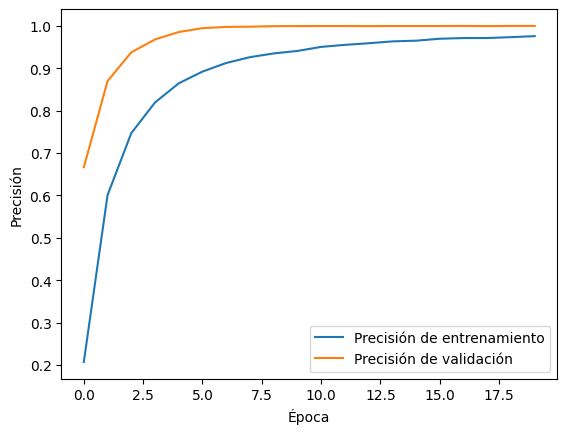

In [6]:
# Gráfico de precisión de entrenamiento vs. precisión de validación durante el entrenamiento de la CNN

plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 367ms/step


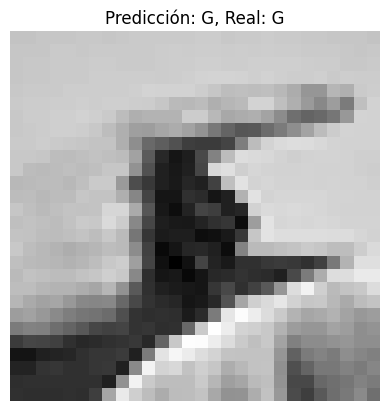

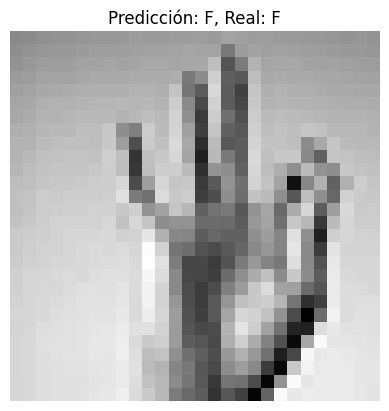

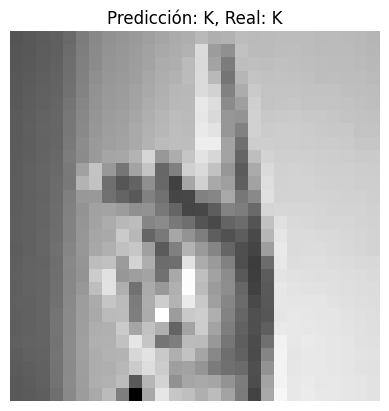

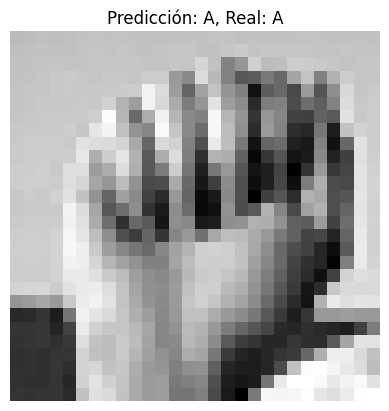

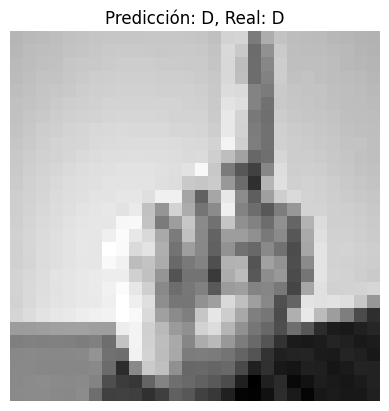

In [7]:
# Paso 5. Predicción / Prueba

# 5 predicciones

predictions = model.predict(X_test[:5])
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    predicted_letter = letters[predicted_label]
    real_label = np.argmax(y_test[i])
    real_letter = letters[real_label]
    plt.title(f'Predicción: {predicted_letter}, Real: {real_letter}')
    plt.axis('off')
    plt.show()